In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# O2GRAD_HOME = cwd = '/home/herrmalu/Documents/MA/o2grad'
O2GRAD_HOME = cwd = '/home/mi/herrmalu/Documents/MA/thesis/o2grad'

In [3]:
def plotfig(data, x, y, xlabel=None, ylabel='time in s', xlog=False, ylog=False, savefig=False, 
            annot=False, annot_pos=None, va='bottom', ha='center', annot_offset=None, c=None, ylim=None):
    fig = plt.figure(figsize=(5, 5))
    plt.rcParams["font.size"] = 11
    if xlog:
        plt.xscale('log')
    if ylog:
        plt.yscale('log')
        
    data = data.sort_values(x)
    data = data.replace('cuda:0', 'gpu')
    data = data.replace('cuda:1', 'gpu')
    data = data.replace('cuda:2', 'gpu')
    data = data.replace('cuda:3', 'gpu')

    cpu_data = data[(data['device'] == 'cpu') & (data['o2grad'] == False)]
    plt.plot(cpu_data[x], cpu_data[y], label='cpu, autograd', marker='+')
    cpu_data_wrap = data[(data['device'] == 'cpu') & (data['o2grad'] == True)]
    plt.plot(cpu_data_wrap[x], cpu_data_wrap[y], label='cpu, o2grad', marker='+')

    gpu_data = data[(data['device'] == 'gpu') & (data['o2grad'] == False)]
    plt.plot(gpu_data[x], gpu_data[y], label='gpu, autograd', marker='+')
    gpu_data_wrap = data[(data['device'] == 'gpu') & (data['o2grad'] == True)]
    plt.plot(gpu_data_wrap[x], gpu_data_wrap[y], label='gpu, o2grad', marker='+')
    
    if annot and y == 'time':
        speedup = np.array([cpu_data[y].to_numpy(), gpu_data[y].to_numpy()]) / gpu_data_wrap[y].to_numpy()
        min_speedup = speedup.min(axis=0)
        annot_str = [f'{x:.1f}x' for x in min_speedup]
        if annot_pos:
            xpos, ypos = zip(*annot_pos)
        else:
            xpos, ypos = gpu_data_wrap[x], gpu_data_wrap[y]
            if annot_offset:
                xpos_offset, ypos_offset = zip(*annot_offset)
                xpos = [x + x_off for x, x_off in zip(xpos, xpos_offset)]
                ypos = [y + y_off for y, y_off in zip(ypos, ypos_offset)]
        for w, x_, y_ in zip(annot_str, xpos, ypos):
            if c:
                plt.text(x_, y_, w, fontsize=14, va=va, ha=ha, c=c)
            else:
                plt.text(x_, y_, w, fontsize=14, va=va, ha=ha)

    xlabel = xlabel or x
    plt.xticks(cpu_data[x])
    if ylim:
        plt.ylim(**ylim)
    # plt.hlines(0, [min(x)], [max(x)], color='grey', linestyles='dotted')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    if savefig:
        plt.savefig(os.path.join(img_dir, f'{savefig}.pdf'), bbox_inches='tight')
    else:
        plt.show()

## Tensor Generation

In [5]:
benchmark_dir = os.path.join(O2GRAD_HOME, 'test', 'modules', 'results', 'benchmark')

In [6]:
img_dir = os.path.join(O2GRAD_HOME, 'results', 'img')

In [20]:
path_dydx = os.path.join(benchmark_dir, 'get_output_input_jacobian.csv')
df_dydx = pd.read_csv(path_dydx, index_col=0)
path_dy2dx2 = os.path.join(benchmark_dir, 'get_output_input_hessian.csv')
df_dy2dx2 = pd.read_csv(path_dy2dx2, index_col=0)
path_dydp = os.path.join(benchmark_dir, 'get_output_param_jacobian.csv')
df_dydp = pd.read_csv(path_dydp, index_col=0)
path_dy2dp2 = os.path.join(benchmark_dir, 'get_output_param_hessian.csv')
df_dy2dp2 = pd.read_csv(path_dy2dp2, index_col=0)
path_dy2dxdp = os.path.join(benchmark_dir, 'get_mixed_output_param_hessian.csv')
df_dy2dxdp = pd.read_csv(path_dy2dxdp, index_col=0)

In [21]:
df_dydx.to_latex(os.path.join(O2GRAD_HOME, 'results', 'dydx.tex'), index=False)
df_dy2dx2.to_latex(os.path.join(O2GRAD_HOME, 'results', 'dy2dx2.tex'), index=False)
df_dydp.to_latex(os.path.join(O2GRAD_HOME, 'results', 'dydp.tex'), index=False)
df_dy2dp2.to_latex(os.path.join(O2GRAD_HOME, 'results', 'dy2dp2.tex'), index=False)
df_dy2dxdp.to_latex(os.path.join(O2GRAD_HOME, 'results', 'dy2dxdp.tex'), index=False)

In [11]:
df_dydx['batch_size'].unique()
df_dydx['input_dim'].unique()

array([ 1,  2, 10, 20])

In [12]:
df_dydx[(df_dydx['batch_size'] == 1) & (df_dydx['input_dim'] == 1)]

,batch_size,input_dim,output_dim,device,t_dense,t_sparse,mem_dense,mem_sparse
0,1,1,1,cpu,0.000111,0.001325,4,20
1,1,1,1,cuda:0,0.000109,0.000344,4,20
2,1,1,2,cpu,0.000098,0.000339,8,40
3,1,1,2,cuda:0,0.000095,0.000339,8,40
4,1,1,10,cpu,0.000100,0.000341,40,200
5,1,1,10,cuda:0,0.000103,0.000346,40,200
6,1,1,20,cpu,0.000100,0.000323,80,400
7,1,1,20,cuda:0,0.000094,0.000323,80,400


In [13]:
df_dydx

,batch_size,input_dim,output_dim,device,t_dense,t_sparse,mem_dense,mem_sparse
0,1,1,1,cpu,0.000111,0.001325,4,20
1,1,1,1,cuda:0,0.000109,0.000344,4,20
2,1,1,2,cpu,0.000098,0.000339,8,40
3,1,1,2,cuda:0,0.000095,0.000339,8,40
4,1,1,10,cpu,0.000100,0.000341,40,200
...,...,...,...,...,...,...,...,...
155,32,20,2,cuda:0,0.000122,0.000404,163840,25600
156,32,20,10,cpu,0.000150,0.000863,819200,128000
157,32,20,10,cuda:0,0.000142,0.000867,819200,128000
158,32,20,20,cpu,0.000154,0.001493,1638400,256000


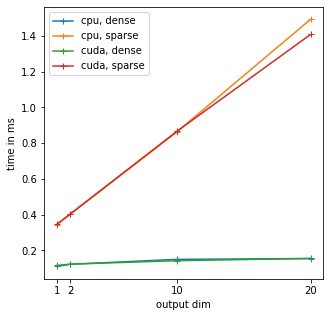

In [179]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dydx[(df_dydx['batch_size'] == 32) & (df_dydx['input_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['output_dim'], 1e+3 * data_cpu['t_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['output_dim'], 1e+3 * data_cpu['t_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['output_dim'], 1e+3 * data_gpu['t_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['output_dim'], 1e+3 * data_gpu['t_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_cpu['output_dim'])
plt.xlabel('output dim')
plt.ylabel('time in ms')
plt.legend()
plt.savefig(os.path.join(img_dir, 'dydx_out_time.pdf'),  bbox_inches='tight')

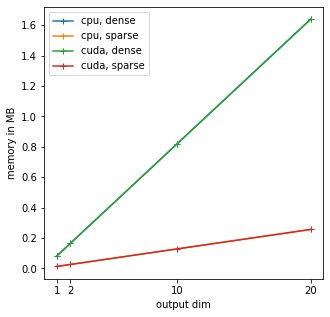

In [136]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dydx[(df_dydx['batch_size'] == 32) & (df_dydx['input_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['output_dim'], 1e-6 * data_cpu['mem_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['output_dim'], 1e-6 * data_cpu['mem_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['output_dim'], 1e-6 * data_gpu['mem_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['output_dim'], 1e-6 * data_gpu['mem_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_cpu['output_dim'])
plt.xlabel('output dim')
plt.ylabel('memory in MB')
plt.legend()
plt.savefig(os.path.join(img_dir, 'dydx_out_mem.pdf'),  bbox_inches='tight')

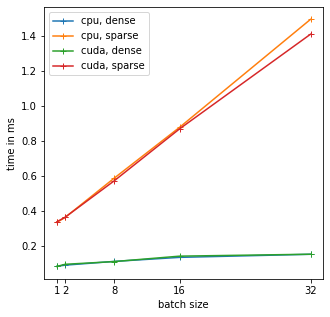

In [180]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dydx[(df_dydx['input_dim'] == 20) & (df_dydx['output_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['batch_size'], 1e+3 * data_cpu['t_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['batch_size'], 1e+3 * data_cpu['t_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['batch_size'], 1e+3 * data_gpu['t_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['batch_size'], 1e+3 * data_gpu['t_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_cpu['batch_size'])
plt.xlabel('batch size')
plt.ylabel('time in ms')
plt.legend()
plt.savefig(os.path.join(img_dir, 'dydx_batch_time.pdf'),  bbox_inches='tight')

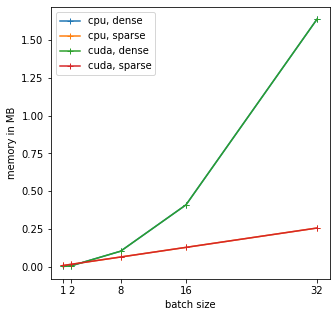

In [181]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dydx[(df_dydx['input_dim'] == 20) & (df_dydx['output_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['batch_size'], 1e-6 * data_cpu['mem_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['batch_size'], 1e-6 * data_cpu['mem_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['batch_size'], 1e-6 * data_gpu['mem_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['batch_size'], 1e-6 * data_gpu['mem_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_gpu['batch_size'])
plt.xlabel('batch size')
plt.ylabel('memory in MB')
plt.legend()
plt.savefig(os.path.join(img_dir, 'dydx_batch_mem.pdf'),  bbox_inches='tight')

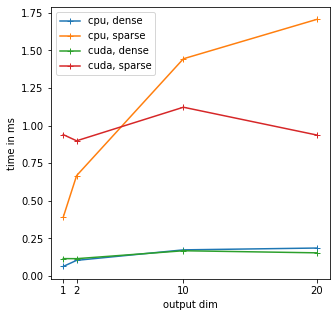

In [182]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dydp[(df_dydp['batch_size'] == 32) & (df_dydp['input_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['output_dim'], 1e+3 * data_cpu['t_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['output_dim'], 1e+3 * data_cpu['t_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['output_dim'], 1e+3 * data_gpu['t_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['output_dim'], 1e+3 * data_gpu['t_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_cpu['output_dim'])
plt.xlabel('output dim')
plt.ylabel('time in ms')
plt.legend(loc='upper left')
plt.savefig(os.path.join(img_dir, 'dydp_out_time.pdf'),  bbox_inches='tight')

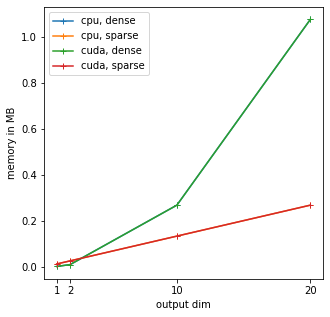

In [183]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dydp[(df_dydp['batch_size'] == 32) & (df_dydp['input_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['output_dim'], 1e-6 * data_cpu['mem_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['output_dim'], 1e-6 * data_cpu['mem_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['output_dim'], 1e-6 * data_gpu['mem_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['output_dim'], 1e-6 * data_gpu['mem_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_cpu['output_dim'])
plt.xlabel('output dim')
plt.ylabel('memory in MB')
plt.legend(loc='upper left')
plt.savefig(os.path.join(img_dir, 'dydp_out_mem.pdf'),  bbox_inches='tight')

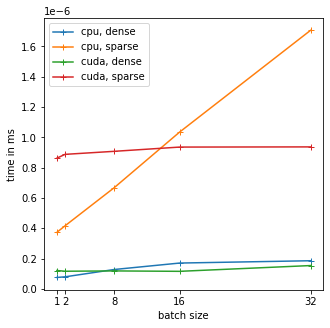

In [141]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dydp[(df_dydp['input_dim'] == 20) & (df_dydp['output_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['batch_size'], 1e-3 * data_cpu['t_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['batch_size'], 1e-3 * data_cpu['t_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['batch_size'], 1e-3 * data_gpu['t_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['batch_size'], 1e-3 * data_gpu['t_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_cpu['batch_size'])
plt.xlabel('batch size')
plt.ylabel('time in ms')
plt.legend(loc='upper left')
plt.savefig(os.path.join(img_dir, 'dydp_batch_time.pdf'),  bbox_inches='tight')

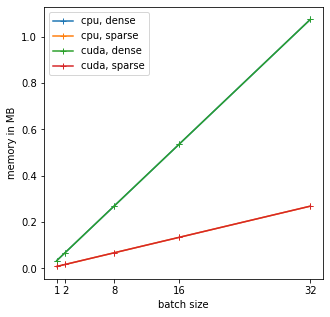

In [184]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dydp[(df_dydp['input_dim'] == 20) & (df_dydp['output_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['batch_size'], 1e-6 * data_cpu['mem_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['batch_size'], 1e-6 * data_cpu['mem_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['batch_size'], 1e-6 * data_gpu['mem_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['batch_size'], 1e-6 * data_gpu['mem_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_cpu['batch_size'])
plt.xlabel('batch size')
plt.ylabel('memory in MB')
plt.legend(loc='upper left')
plt.savefig(os.path.join(img_dir, 'dydp_batch_mem.pdf'),  bbox_inches='tight')

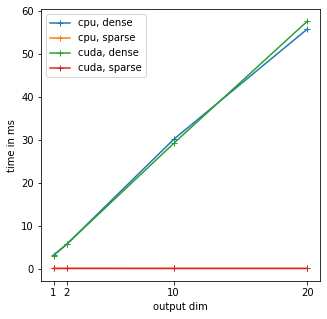

In [178]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dy2dx2[(df_dy2dx2['batch_size'] == 32) & (df_dy2dx2['input_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['output_dim'], 1e+3 * data_cpu['t_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['output_dim'], 1e+3 * data_cpu['t_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['output_dim'], 1e+3 * data_gpu['t_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['output_dim'], 1e+3 * data_gpu['t_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_cpu['output_dim'])
plt.xlabel('output dim')
plt.ylabel('time in ms')
plt.legend(loc='upper left')
plt.savefig(os.path.join(img_dir, 'dy2dx2_out_time.pdf'),  bbox_inches='tight')

plt.show()

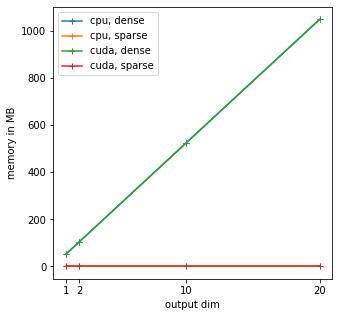

In [177]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dy2dx2[(df_dy2dx2['batch_size'] == 32) & (df_dy2dx2['input_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['output_dim'], 1e-6 * data_cpu['mem_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['output_dim'], 1e-6 * data_cpu['mem_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['output_dim'], 1e-6 * data_gpu['mem_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['output_dim'], 1e-6 * data_gpu['mem_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_cpu['output_dim'])
plt.xlabel('output dim')
plt.ylabel('memory in MB')
plt.legend(loc='upper left')
plt.savefig(os.path.join(img_dir, 'dy2dx2_out_mem.pdf'),  bbox_inches='tight')

plt.show()

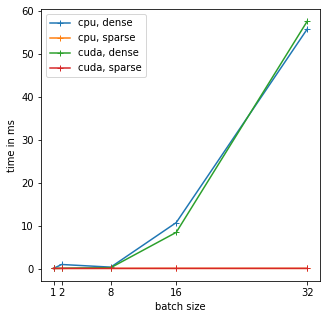

In [176]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dy2dx2[(df_dy2dx2['input_dim'] == 20) & (df_dy2dx2['output_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['batch_size'], 1e+3 * data_cpu['t_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['batch_size'], 1e+3 * data_cpu['t_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['batch_size'], 1e+3 * data_gpu['t_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['batch_size'], 1e+3 * data_gpu['t_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_cpu['batch_size'])
plt.xlabel('batch size')
plt.ylabel('time in ms')
plt.legend()
plt.savefig(os.path.join(img_dir, 'dy2dx2_batch_time.pdf'),  bbox_inches='tight')

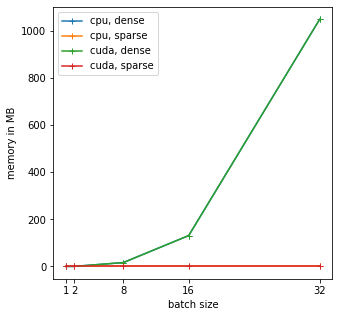

In [14]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dy2dx2[(df_dy2dx2['input_dim'] == 20) & (df_dy2dx2['output_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['batch_size'], 1e-6 * data_cpu['mem_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['batch_size'], 1e-6 * data_cpu['mem_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['batch_size'], 1e-6 * data_gpu['mem_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['batch_size'], 1e-6 * data_gpu['mem_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_gpu['batch_size'])
plt.xlabel('batch size')
plt.ylabel('memory in MB')
plt.legend()
plt.savefig(os.path.join(img_dir, 'dy2dx2_batch_mem.pdf'),  bbox_inches='tight')

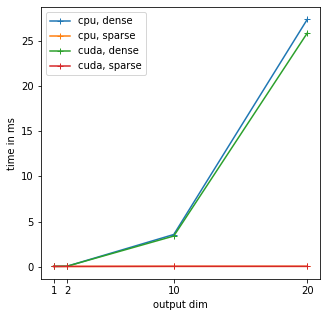

In [16]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dy2dp2[(df_dy2dp2['batch_size'] == 32) & (df_dy2dp2['input_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['output_dim'], 1e+3 * data_cpu['t_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['output_dim'], 1e+3 * data_cpu['t_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['output_dim'], 1e+3 * data_gpu['t_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['output_dim'], 1e+3 * data_gpu['t_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_cpu['output_dim'])
plt.xlabel('output dim')
plt.ylabel('time in ms')
plt.legend(loc='upper left')
plt.savefig(os.path.join(img_dir, 'dy2dp2_out_time.pdf'),  bbox_inches='tight')

plt.show()

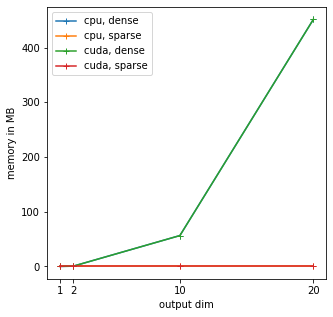

In [15]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dy2dp2[(df_dy2dp2['batch_size'] == 32) & (df_dy2dp2['input_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['output_dim'], 1e-6 * data_cpu['mem_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['output_dim'], 1e-6 * data_cpu['mem_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['output_dim'], 1e-6 * data_gpu['mem_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['output_dim'], 1e-6 * data_gpu['mem_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_cpu['output_dim'])
plt.xlabel('output dim')
plt.ylabel('memory in MB')
plt.legend(loc='upper left')
plt.savefig(os.path.join(img_dir, 'dy2dp2_out_mem.pdf'),  bbox_inches='tight')

plt.show()

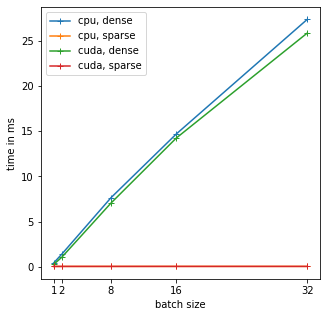

In [17]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dy2dp2[(df_dy2dp2['input_dim'] == 20) & (df_dy2dp2['output_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['batch_size'], 1e+3 * data_cpu['t_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['batch_size'], 1e+3 * data_cpu['t_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['batch_size'], 1e+3 * data_gpu['t_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['batch_size'], 1e+3 * data_gpu['t_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_cpu['batch_size'])
plt.xlabel('batch size')
plt.ylabel('time in ms')
plt.legend()
plt.savefig(os.path.join(img_dir, 'dy2dp2_batch_time.pdf'),  bbox_inches='tight')

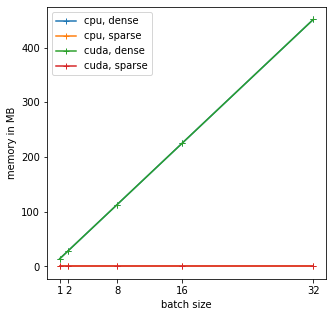

In [18]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dy2dp2[(df_dy2dp2['input_dim'] == 20) & (df_dy2dp2['output_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['batch_size'], 1e-6 * data_cpu['mem_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['batch_size'], 1e-6 * data_cpu['mem_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['batch_size'], 1e-6 * data_gpu['mem_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['batch_size'], 1e-6 * data_gpu['mem_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_gpu['batch_size'])
plt.xlabel('batch size')
plt.ylabel('memory in MB')
plt.legend()
plt.savefig(os.path.join(img_dir, 'dy2dp2_batch_mem.pdf'),  bbox_inches='tight')

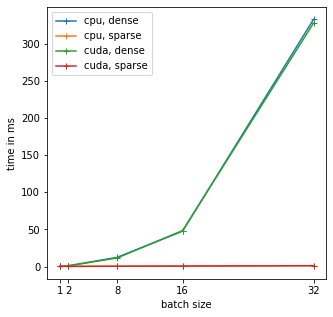

In [148]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dy2dxdp[(df_dy2dxdp['input_dim'] == 20) & (df_dy2dxdp['output_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['batch_size'], 1e+3 * data_cpu['t_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['batch_size'], 1e+3 * data_cpu['t_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['batch_size'], 1e+3 * data_gpu['t_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['batch_size'], 1e+3 * data_gpu['t_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_cpu['batch_size'])
plt.xlabel('batch size')
plt.ylabel('time in ms')
plt.legend()
plt.savefig(os.path.join(img_dir, 'dy2dxdp_batch_time.pdf'),  bbox_inches='tight')

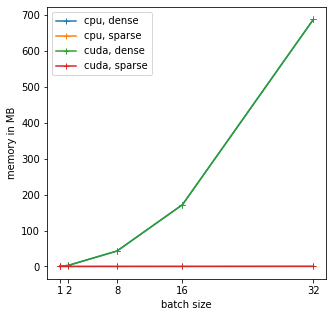

In [145]:
fig = plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 10

data = df_dy2dxdp[(df_dy2dxdp['input_dim'] == 20) & (df_dy2dxdp['output_dim'] == 20)]
data_cpu = data[data['device'] == 'cpu']
plt.plot(data_cpu['batch_size'], 1e-6 * data_cpu['mem_dense'], label='cpu, dense', marker='+')
plt.plot(data_cpu['batch_size'], 1e-6 * data_cpu['mem_sparse'], label='cpu, sparse', marker='+')
data_gpu = data[data['device'] == 'cuda:0']
plt.plot(data_gpu['batch_size'], 1e-6 * data_gpu['mem_dense'], label='cuda, dense', marker='+')
plt.plot(data_gpu['batch_size'], 1e-6 * data_gpu['mem_sparse'], label='cuda, sparse', marker='+')
plt.xticks(data_gpu['batch_size'])
plt.xlabel('batch size')
plt.ylabel('memory in MB')
plt.legend()
plt.savefig(os.path.join(img_dir, 'dy2dxdp_batch_mem.pdf'),  bbox_inches='tight')

## MLP Grid

In [229]:
benchmark_dir = os.path.join(O2GRAD_HOME, 'results', 'benchmark_test')
img_dir = os.path.join(O2GRAD_HOME, 'results', 'img')
path= os.path.join(benchmark_dir, 'mlp_grid.csv')
df_mlp = pd.read_csv(path, index_col=0)

In [230]:
df_mlp

,input_dim,inter_dim,output_dim,batch_size,o2grad,device,time,mem,err
0,5,5,5,1,False,cpu,0.079661,1075.035156,0.000000e+00
1,5,5,5,1,False,cuda:2,0.173727,4086.953683,1.490116e-08
2,5,5,5,1,True,cpu,0.049686,4093.781250,1.490116e-08
3,5,5,5,1,True,cuda:2,0.092336,4333.601562,1.490116e-08
4,5,5,5,8,False,cpu,0.060681,4333.664062,0.000000e+00
...,...,...,...,...,...,...,...,...,...
59,100,100,100,16,True,cuda:2,1.064196,7266.262835,2.793968e-09
60,100,100,100,32,False,cpu,15.358393,7517.274482,0.000000e+00
61,100,100,100,32,False,cuda:2,18.319512,7501.250244,2.793968e-09
62,100,100,100,32,True,cpu,34.347607,7525.226405,3.725290e-09


In [96]:
latex_path = os.path.join(benchmark_dir, 'mlp_grid.tex')
df_mlp.to_latex(latex_path)

In [97]:
df_mlp['mem'].isnull().any()

False

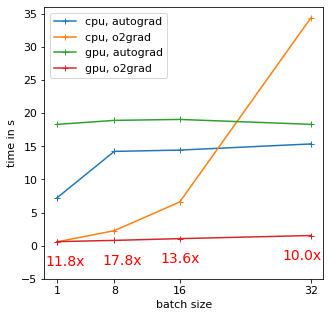

In [250]:
x=-2
data = df_mlp[(df_mlp['input_dim'] == 100)]
plotfig(data, 'batch_size', 'time', xlabel='batch size', ylabel='time in s', 
        annot=True,
        annot_offset=[(1,x), (1,x), (0,x), (-1,x)],
        va='top',
        ha='center',
        c='r',
        ylim=dict(bottom=-5),
        savefig='mlp_batch_time')

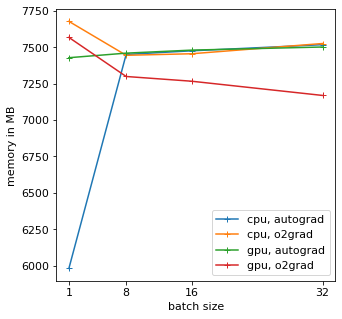

In [63]:
data = df_mlp[(df_mlp['input_dim'] == 100)]
plotfig(data, 'batch_size', 'mem', xlabel='batch size', ylabel='memory in MB', savefig='mlp_batch_mem')

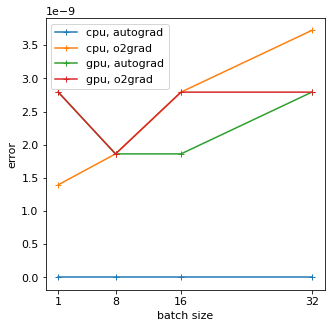

In [82]:
data = df_mlp[(df_mlp['input_dim'] == 100)]
plotfig(data, 'batch_size', 'err', xlabel='batch size', ylabel='error', savefig='mlp_batch_err')

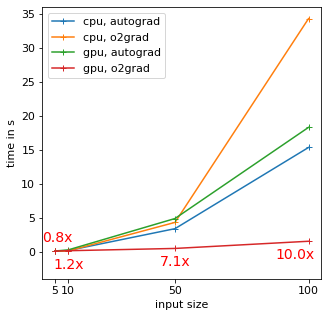

In [248]:
data = df_mlp[(df_mlp['batch_size'] == 32)]

x=-1
plotfig(data, 'input_dim', 'time', xlabel='input size', ylabel='time in s', 
        annot=True,
        annot_offset=[(1,3), (0,x), (0,x), (-5,x)],
        va='top',
        ha='center',
        c='r',
        ylim=dict(bottom=-4),
        savefig='mlp_input_time')

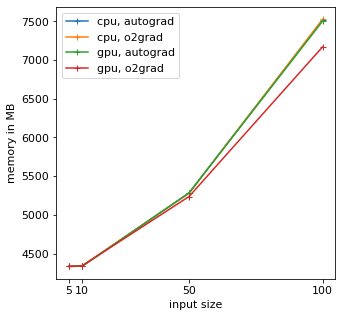

In [66]:
data = df_mlp[(df_mlp['batch_size'] == 32)]
plotfig(data, 'input_dim', 'mem', xlabel='input size', ylabel='memory in MB', savefig='mlp_input_mem')

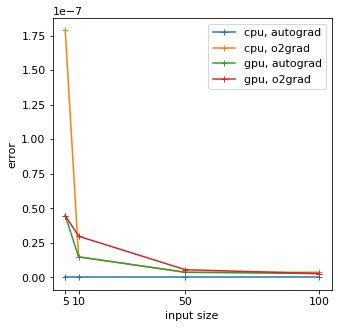

In [67]:
data = df_mlp[(df_mlp['batch_size'] == 32)]
plotfig(data, 'input_dim', 'err', xlabel='input size', ylabel='error', savefig='mlp_input_err')

In [120]:
data

,input_dim,inter_dim,output_dim,batch_size,o2grad,device,time,mem,err
12,5,5,5,32,False,cpu,0.077579,4334.363281,0.000000e+00
13,5,5,5,32,False,cuda:2,0.093357,4334.363281,4.470348e-08
14,5,5,5,32,True,cpu,0.063764,4335.997159,1.788139e-07
15,5,5,5,32,True,cuda:2,0.093056,4336.347656,4.470348e-08
28,10,10,10,32,False,cpu,0.166668,4337.636719,0.000000e+00
29,10,10,10,32,False,cuda:2,0.261528,4337.640625,1.490116e-08
30,10,10,10,32,True,cpu,0.108658,4343.246094,1.490116e-08
31,10,10,10,32,True,cuda:2,0.139125,4343.609375,2.980232e-08
44,50,50,50,32,False,cpu,3.390514,5283.884821,0.000000e+00
45,50,50,50,32,False,cuda:2,4.887055,5283.018834,3.725290e-09


## MLP MNIST

In [58]:
benchmark_dir = os.path.join(O2GRAD_HOME, 'results', 'benchmark_test')
img_dir = os.path.join(O2GRAD_HOME, 'results', 'img')
path= os.path.join(benchmark_dir, 'mlp_mnist.csv')
df = pd.read_csv(path, index_col=0)

In [59]:
df

,input_dim,inter_dim,output_dim,batch_size,o2grad,device,time,mem,err
0,784,10,10,1,False,cpu,2.586195,1194.317243,0.000000e+00
1,784,10,10,1,False,cuda:2,7.406162,4448.898619,1.490116e-08
2,784,10,10,1,True,cpu,0.109215,4471.200195,7.450581e-09
3,784,10,10,1,True,cuda:2,0.375151,4713.561523,1.490116e-08
4,784,10,10,8,False,cpu,3.709978,4709.658301,0.000000e+00
5,784,10,10,8,False,cuda:2,6.639905,4713.655189,1.490116e-08
6,784,10,10,8,True,cpu,0.222116,4889.710938,1.490116e-08
7,784,10,10,8,True,cuda:2,0.137109,4677.972656,1.490116e-08
8,784,10,10,16,False,cpu,3.883786,4731.917492,0.000000e+00
9,784,10,10,16,False,cuda:2,8.176892,4737.447242,1.490116e-08


In [60]:
df.to_latex(os.path.join(benchmark_dir, 'mlp_mnist.tex'))

## Return Layout:

In [35]:
benchmark_dir = os.path.join(O2GRAD_HOME, 'test', 'results', 'benchmark')
os.path.exists(benchmark_dir)

True

In [36]:
path = os.path.join(benchmark_dir, 'mlp_layout.csv')
df = pd.read_csv(path, index_col=0)

In [37]:
df

,dydx,dy2dx2,dydp,dy2dp2,dy2dxdp,time,mem
0,torch.sparse_coo,torch.sparse_coo,torch.sparse_coo,torch.sparse_coo,torch.sparse_coo,2.190515,1389.086589
1,torch.sparse_coo,torch.sparse_coo,torch.sparse_coo,torch.sparse_coo,torch.strided,4.485122,5683.705286
2,torch.sparse_coo,torch.sparse_coo,torch.sparse_coo,torch.strided,torch.sparse_coo,2.267529,5313.916016
3,torch.sparse_coo,torch.sparse_coo,torch.sparse_coo,torch.strided,torch.strided,4.563666,9711.037483
4,torch.sparse_coo,torch.sparse_coo,torch.strided,torch.sparse_coo,torch.sparse_coo,0.190835,1172.732812
5,torch.sparse_coo,torch.sparse_coo,torch.strided,torch.sparse_coo,torch.strided,2.509868,6195.029715
6,torch.sparse_coo,torch.sparse_coo,torch.strided,torch.strided,torch.sparse_coo,1.195208,4571.143490
7,torch.sparse_coo,torch.sparse_coo,torch.strided,torch.strided,torch.strided,3.637806,9908.015234
8,torch.sparse_coo,torch.strided,torch.sparse_coo,torch.sparse_coo,torch.sparse_coo,0.956769,2738.599760
9,torch.sparse_coo,torch.strided,torch.sparse_coo,torch.sparse_coo,torch.strided,3.327042,6409.494715


In [38]:
df.to_latex(os.path.join(O2GRAD_HOME, 'results', 'linear_layout.tex'))

## Conv2d MNIST

In [267]:
benchmark_dir = os.path.join(O2GRAD_HOME, 'results', 'benchmark_test')
img_dir = os.path.join(O2GRAD_HOME, 'results', 'img')
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

path = os.path.join(benchmark_dir, 'conv2d_mnist.csv')
df = pd.read_csv(path, index_col=0)

In [5]:
df

,input_dim,in_channels,out_channels,block_cnt,batch_size,o2grad,device,time,mem
0,28,1,10,2,1,True,cpu,128.564604,2658.899248
1,28,1,10,2,1,True,cuda:0,5.418229,4520.993395
2,28,1,10,2,1,False,cpu,31.015664,4761.333078
3,28,1,10,2,1,False,cuda:0,20.044696,4767.152813
4,28,1,10,2,2,True,cpu,268.452337,7568.507811
5,28,1,10,2,2,True,cuda:0,NaN,NaN
6,28,1,10,2,2,False,cpu,60.421726,5229.026406
7,28,1,10,2,2,False,cuda:0,15.881729,5252.066406
8,28,1,10,2,4,True,cpu,529.110169,10491.128717
9,28,1,10,2,4,True,cuda:0,NaN,NaN


In [54]:
df.to_latex(os.path.join(benchmark_dir, 'conv2d_mnist.tex'))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


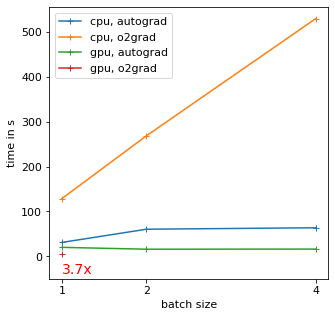

In [273]:
data = df
x=-20
plotfig(data, 'batch_size', 'time', xlabel='batch size', ylabel='time in s',
        annot=True,
        annot_offset=[(0,x), (0,x), (0,x), (0,x)],
        va='top',
        ha='left',
        c='r',
        ylim=dict(bottom=-50),
        savefig='conv2d_mnist_time.pdf')

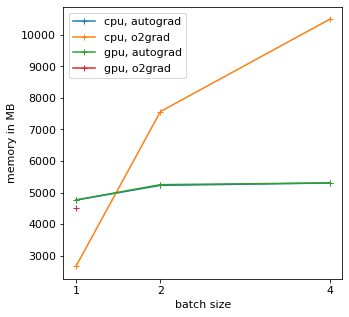

In [277]:
plotfig(data, 'batch_size', 'mem', xlabel='batch size', ylabel='memory in MB', savefig='conv2d_mnist_mem.pdf')

### Grid

In [180]:
benchmark_dir = os.path.join(O2GRAD_HOME, 'results', 'benchmark_test')

In [186]:
path = os.path.join(benchmark_dir, 'conv2d_input.csv')
df_input_dim = pd.read_csv(path, index_col=0)
path = os.path.join(benchmark_dir, 'conv2d_block.csv')
df_block = pd.read_csv(path, index_col=0)
path = os.path.join(benchmark_dir, 'conv2d_block_gpu.csv')
df_block_gpu = pd.read_csv(path, index_col=0)
path = os.path.join(benchmark_dir, 'conv2d_out.csv')
df_out_channels = pd.read_csv(path, index_col=0)
path = os.path.join(benchmark_dir, 'conv2d_batch.csv')
df_batch_size = pd.read_csv(path, index_col=0)

In [187]:
df_block = df_block[(df_block['device'] != 'cuda:2') | (df_block['o2grad'] != True)]
df_block = pd.concat([df_block, df_block_gpu])

In [103]:
df_conv2d_grid = pd.concat([df_input_dim, 
                            df_out_channels, 
                            df_block,
                            df_batch_size])
df_conv2d_grid.round({'time': 3, 'mem': 1, 'err': 3})

,input_dim,in_channels,out_channels,block_cnt,batch_size,o2grad,device,time,mem,err
0,4,3,10,10,8,False,cpu,1253.586,7550.6,0.0
1,4,3,10,10,8,False,cuda:2,73.795,17094.2,0.0
2,4,3,10,10,8,True,cpu,9.600,17223.9,0.0
3,4,3,10,10,8,True,cuda:2,1.939,17791.3,0.0
4,8,3,10,10,8,False,cpu,265.745,18173.7,0.0
...,...,...,...,...,...,...,...,...,...,...
11,16,3,10,10,8,True,cuda:1,22.103,8637.4,0.0
12,16,3,10,10,16,False,cpu,516.955,8972.6,0.0
13,16,3,10,10,16,False,cuda:1,96.721,8983.0,0.0
14,16,3,10,10,16,True,cpu,1351.234,12166.0,0.0


In [24]:
df_conv2d_grid.to_latex(os.path.join(O2GRAD_HOME, 'results', 'conv2d_grid.tex'), index=False)

In [9]:
df_block

,input_dim,in_channels,out_channels,block_cnt,batch_size,o2grad,device,time,mem,err
0,16,3,10,1,8,False,cpu,113.893112,1313.717945,0.000000e+00
1,16,3,10,1,8,False,cuda:2,11.749025,4509.792501,2.980232e-08
2,16,3,10,1,8,True,cpu,90.481467,6061.944858,7.450581e-08
4,16,3,10,5,8,False,cpu,189.418314,5465.811288,0.000000e+00
5,16,3,10,5,8,False,cuda:2,38.428435,5773.007131,2.235174e-08
6,16,3,10,5,8,True,cpu,348.446826,7375.247815,7.450581e-08
8,16,3,10,10,8,False,cpu,418.201622,6406.497795,0.000000e+00
9,16,3,10,10,8,False,cuda:2,90.843417,7256.968720,3.725290e-08
10,16,3,10,10,8,True,cpu,661.706546,9021.091908,9.313226e-08
12,16,3,10,20,8,False,cpu,5670.095454,8635.063080,0.000000e+00


In [99]:
df_block.to_csv(os.path.join(benchmark_dir, 'conv2d_block_joined.csv'))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


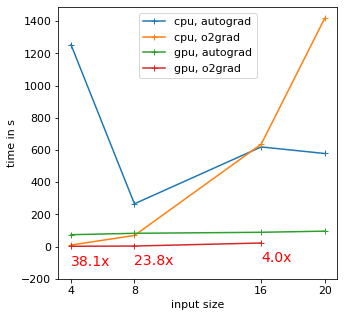

In [192]:
x=-50
data = df_input_dim.sort_values('input_dim')
plotfig(data, 'input_dim', 'time', xlabel='input size', ylabel='time in s',
        annot=True,
        annot_offset=[(0,x), (0,x), (0,x), (0,x)],
        va='top',
        ha='left',
        c='r',
        ylim=dict(bottom=-200),
        savefig='conv2d_input_time')

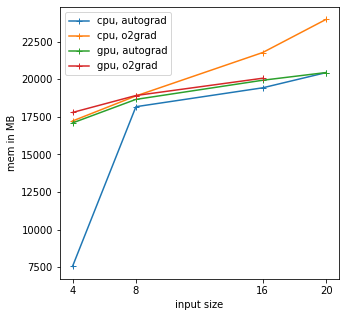

In [35]:
data = df_input_dim.sort_values('input_dim')
data = data.replace('cuda:2', 'gpu')
plotfig(data, 'input_dim', 'mem', xlabel='input size', ylabel='mem in MB', savefig='conv2d_input_mem')

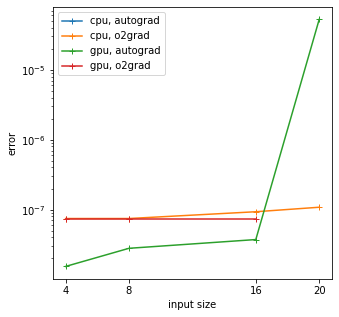

In [36]:
data = df_input_dim.sort_values('input_dim')
data = data.replace('cuda:2', 'gpu')
plotfig(data, 'input_dim', 'err', xlabel='input size', ylabel='error', ylog=True, savefig='conv2d_input_err')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


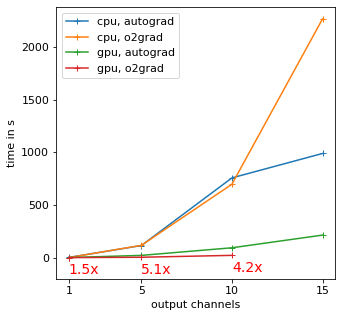

In [195]:
x=-50
data = df_out_channels.sort_values('out_channels')
plotfig(data, 'out_channels', 'time', xlabel='output channels', ylabel='time in s', 
        annot=True,
        annot_offset=[(0,x), (0,x), (0,x), (0,x)],
        va='top',
        ha='left',
        c='r',
        ylim=dict(bottom=-200),
        savefig='conv2d_out_time')

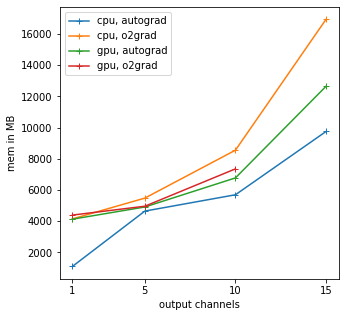

In [38]:
data = df_out_channels.sort_values('out_channels')
data = data.replace('cuda:1', 'gpu')
plotfig(data, 'out_channels', 'mem', xlabel='output channels', ylabel='mem in MB', savefig='conv2d_out_mem')

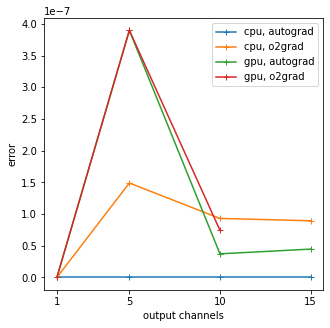

In [39]:
data = df_out_channels.sort_values('out_channels')
data = data.replace('cuda:1', 'gpu')
plotfig(data, 'out_channels', 'err', xlabel='output channels', ylabel='error', savefig='conv2d_out_err')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


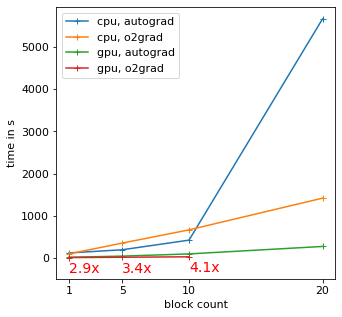

In [198]:
x=-100
data = df_block.sort_values('block_cnt')
plotfig(data, 'block_cnt', 'time', xlabel='block count', ylabel='time in s', 
        annot=True,
        annot_offset=[(0,x), (0,x), (0,x), (0,x)],
        va='top',
        ha='left',
        c='r',
        ylim=dict(bottom=-500),
        savefig='conv2d_block_time')

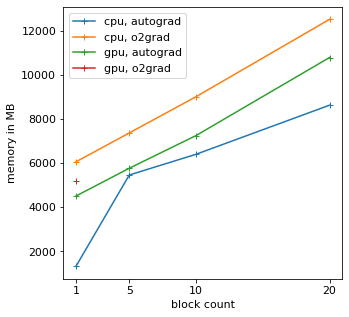

In [185]:
x=-50
data = df_block.sort_values('block_cnt')
plotfig(data, 'block_cnt', 'mem', xlabel='block count', ylabel='memory in MB', 
        # annot_offset=[(0,x), (0,x), (0,x), (0,x)],
        va='top',
        c='r',
        # ylim=dict(bottom=-200),
        savefig='conv2d_block_mem')

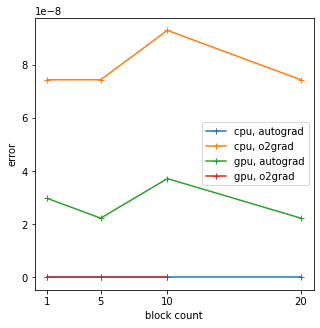

In [42]:
data = df_block.sort_values('block_cnt')
data = data.replace('cuda:2', 'gpu').replace('cuda:3', 'gpu')
plotfig(data, 'block_cnt', 'err', xlabel='block count', ylabel='error', savefig='conv2d_block_err')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


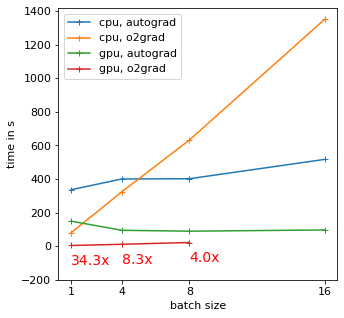

In [184]:
x=-50
data = df_batch_size.sort_values('batch_size')
plotfig(data, 'batch_size', 'time', xlabel='batch size', ylabel='time in s',
        annot=True,
        annot_offset=[(0,x), (0,x), (0,x), (0,x)],
        va='top',
        ha='left',
        c='r',
        ylim=dict(bottom=-200),
        savefig='conv2d_batch_time')

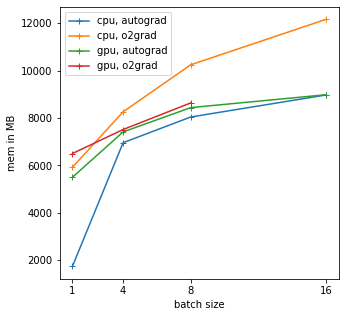

In [44]:
data = df_batch_size.sort_values('batch_size')
data = data.replace('cuda:1', 'gpu')
plotfig(data, 'batch_size', 'mem', xlabel='batch size', ylabel='mem in MB', savefig='conv2d_batch_mem')

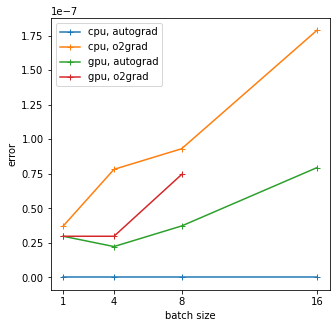

In [45]:
data = df_batch_size.sort_values('batch_size')
data = data.replace('cuda:1', 'gpu')
plotfig(data, 'batch_size', 'err', xlabel='batch size', ylabel='error', savefig='conv2d_batch_err')

## Conv1d

In [22]:
benchmark_dir = os.path.join(O2GRAD_HOME, 'results', 'benchmark_test')
img_dir = os.path.join(O2GRAD_HOME, 'results', 'img')

In [23]:
# path = os.path.join(benchmark_dir, 'conv1d_input8.csv')
# df_input8 = pd.read_csv(path, index_col=0)
# path = os.path.join(benchmark_dir, 'conv1d_input16.csv')
# df_input16 = pd.read_csv(path, index_col=0)
# path = os.path.join(benchmark_dir, 'conv1d_input32.csv')
# df_input32 = pd.read_csv(path, index_col=0)
# path = os.path.join(benchmark_dir, 'conv1d_input64.csv')
# df_input64 = pd.read_csv(path, index_col=0)
# df_input_dim = pd.concat([df_input8, df_input16, df_input32, df_input64])
path = os.path.join(benchmark_dir, 'conv1d_input.csv')
df_input_dim = pd.read_csv(path, index_col=0)
path = os.path.join(benchmark_dir, 'conv1d_batch.csv')
df_batch_size = pd.read_csv(path, index_col=0)
path = os.path.join(benchmark_dir, 'conv1d_block.csv')
df_block_cnts = pd.read_csv(path, index_col=0)
path = os.path.join(benchmark_dir, 'conv1d_out_.csv')
df_out_channels = pd.read_csv(path, index_col=0)
df = pd.concat([df_input_dim, 
                df_out_channels,
                df_block_cnts,
                df_batch_size, 
])

In [24]:
df_out_channels

,input_dim,in_channels,out_channels,block_cnt,batch_size,o2grad,device,time,mem,err
0,64,3,15,20,16,False,cpu,1541.285756,5668.500728,0.000000e+00
1,64,3,15,20,16,False,cuda:2,262.523376,11471.344795,1.117587e-08
2,64,3,15,20,16,True,cpu,408.647989,12933.814998,4.097819e-08
3,64,3,15,20,16,True,cuda:2,14.208562,13092.442416,2.980232e-08
4,64,3,1,20,16,False,cpu,3.966330,13137.681108,0.000000e+00
5,64,3,1,20,16,False,cuda:2,1.556473,11990.488281,0.000000e+00
6,64,3,1,20,16,True,cpu,0.712614,11991.990412,0.000000e+00
7,64,3,1,20,16,True,cuda:2,1.708935,11992.449219,0.000000e+00
8,64,3,5,20,16,False,cpu,114.484541,12433.915505,0.000000e+00
9,64,3,5,20,16,False,cuda:2,37.579612,12762.031250,5.960464e-08


In [27]:
df

,input_dim,in_channels,out_channels,block_cnt,batch_size,o2grad,device,time,mem,err
0,100,3,15,20,16,False,cpu,944.192806,3443.043889,0.000000e+00
1,100,3,15,20,16,False,cuda:3,248.922279,9236.675957,1.117587e-08
2,100,3,15,20,16,True,cpu,816.692500,12085.576270,5.215406e-08
3,100,3,15,20,16,True,cuda:3,25.796013,11658.931139,1.490116e-08
0,16,3,15,20,16,False,cpu,11139.981005,6613.052104,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
11,64,3,15,20,4,True,cuda:3,4.988042,31057.929618,1.490116e-08
12,64,3,15,20,8,False,cpu,861.878221,36507.122522,0.000000e+00
13,64,3,15,20,8,False,cuda:3,290.506031,39121.704487,1.490116e-08
14,64,3,15,20,8,True,cpu,183.695773,39641.113501,2.235174e-08


In [10]:
df.to_latex(os.path.join(benchmark_dir, 'conv1d_grid.tex'))

In [19]:
df_input_dim

,input_dim,in_channels,out_channels,block_cnt,batch_size,o2grad,device,time,mem,err
0,100,3,15,20,16,False,cpu,944.192806,3443.043889,0.000000e+00
1,100,3,15,20,16,False,cuda:3,248.922279,9236.675957,1.117587e-08
2,100,3,15,20,16,True,cpu,816.692500,12085.576270,5.215406e-08
3,100,3,15,20,16,True,cuda:3,25.796013,11658.931139,1.490116e-08
0,16,3,15,20,16,False,cpu,11139.981005,6613.052104,0.000000e+00
1,16,3,15,20,16,False,cuda:0,227.812361,12674.131277,1.490116e-08
2,16,3,15,20,16,True,cpu,53.405171,11702.818158,3.725290e-08
3,16,3,15,20,16,True,cuda:0,3.730094,12613.985584,2.980232e-08
0,32,3,15,20,16,False,cpu,11374.972833,5801.698128,0.000000e+00
1,32,3,15,20,16,False,cuda:1,290.430627,10301.962937,1.117587e-08


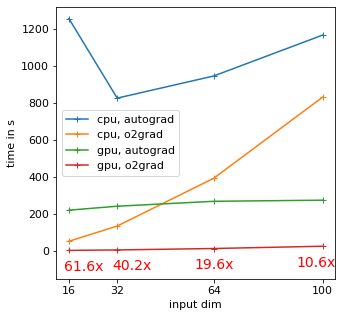

In [265]:
x=-50
data = df_input_dim
plotfig(data, 'input_dim', 'time', xlabel='input dim', ylabel='time in s', 
        annot=True,
        annot_offset=[(5,x), (5,x), (0,x), (-2,x)],
        va='top',
        ha='center',
        c='r',
        ylim=dict(bottom=-150),
        savefig='conv1d_input_time')

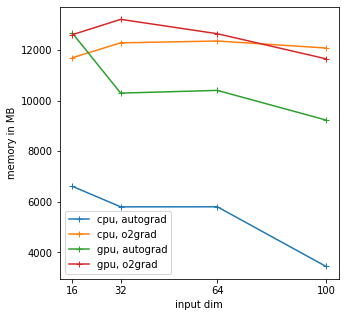

In [37]:
data = df_input_dim
plotfig(data, 'input_dim', 'mem', xlabel='input dim', ylabel='memory in MB', savefig='conv1d_input_mem')

In [80]:
data

,input_dim,in_channels,out_channels,block_cnt,batch_size,o2grad,device,time,mem,err
0,16,3,15,20,16,False,cpu,11139.981005,6613.052104,0.000000e+00
1,16,3,15,20,16,False,cuda:0,227.812361,12674.131277,1.490116e-08
2,16,3,15,20,16,True,cpu,53.405171,11702.818158,3.725290e-08
3,16,3,15,20,16,True,cuda:0,3.730094,12613.985584,2.980232e-08
0,32,3,15,20,16,False,cpu,11374.972833,5801.698128,0.000000e+00
1,32,3,15,20,16,False,gpu,290.430627,10301.962937,1.117587e-08
2,32,3,15,20,16,True,cpu,135.250999,12290.508487,4.470348e-08
3,32,3,15,20,16,True,gpu,6.052072,13220.439867,2.980232e-08
0,64,3,15,20,16,False,cpu,12133.095380,5803.170797,0.000000e+00
1,64,3,15,20,16,False,gpu,285.363246,10409.384700,1.117587e-08


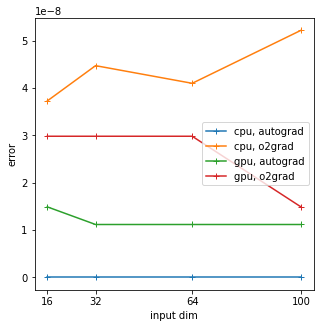

In [34]:
data = df_input_dim
plotfig(data, 'input_dim', 'err', xlabel='input dim', ylabel='error', savefig='conv1d_input_err')

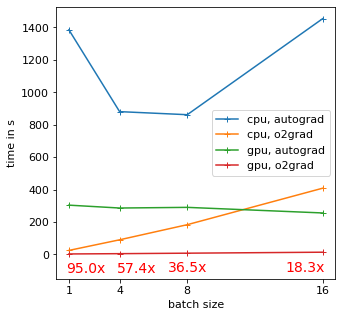

In [261]:
data = df_batch_size
x=-50
plotfig(data, 'batch_size', 'time', xlabel='batch size', ylabel='time in s', 
        annot=True,
        annot_offset=[(1,x), (1,x), (0,x), (-1,x)],
        va='top',
        c='r',
        ylim=dict(bottom=-150),
        savefig='conv1d_batch_time')

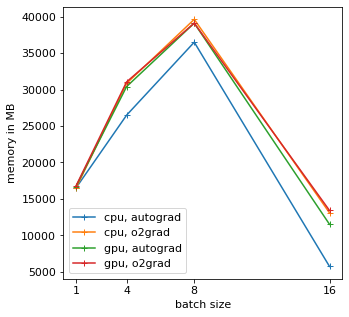

In [136]:
data = df_batch_size.sort_values('batch_size')
plotfig(data, 'batch_size', 'mem', xlabel='batch size', ylabel='memory in MB', savefig='conv1d_batch_mem')

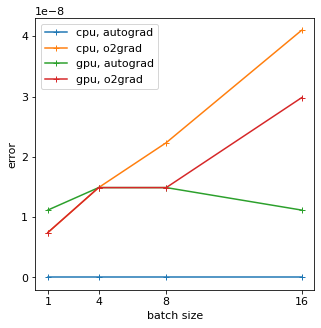

In [135]:
data = df_batch_size.sort_values('batch_size')
plotfig(data, 'batch_size', 'err', xlabel='batch size', ylabel='error', savefig='conv1d_batch_err')

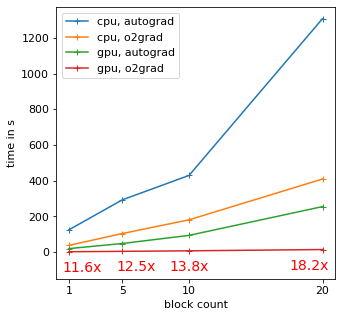

In [259]:
data = df_block_cnts
x=-50
plotfig(data, 'block_cnt', 'time', xlabel='block count', ylabel='time in s', 
        annot=True,
        annot_offset=[(1,x), (1,x), (0,x), (-1,x)],
        va='top',
        c='r',
        ylim=dict(bottom=-150),
        savefig='conv1d_block_time')

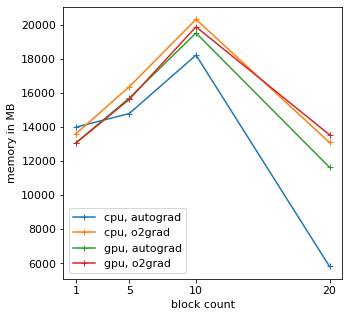

In [257]:
data = df_block_cnts
data = data.replace('cuda:3', 'gpu').sort_values('block_cnt')
plotfig(data, 'block_cnt', 'mem', xlabel='block count', ylabel='memory in MB', savefig='conv1d_block_mem')

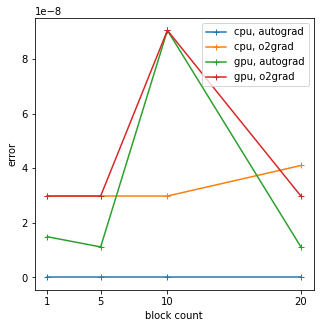

In [89]:
data = df_block_cnts
data = data.replace('cuda:3', 'gpu').sort_values('block_cnt')
plotfig(data, 'block_cnt', 'err', xlabel='block count', ylabel='error', savefig='conv1d_block_err')

In [90]:
speedup = []
for block_cnt in data['block_cnt'].unique():
    baseline = data[(data['block_cnt'] == block_cnt) & 
                    (data['device'] == 'gpu') &
                    (data['o2grad'] == False)]['time'].values[0]
    top = data[(data['block_cnt'] == block_cnt) & 
               (data['device'] == 'gpu') &
               (data['o2grad'] == True)]['time'].values[0]
    speedup.append(baseline / top)

print(speedup)

[11.577892250843545, 12.482133374666901, 13.828218014795844, 18.16171537003538]


In [43]:
df_out_channels

,input_dim,in_channels,out_channels,block_cnt,batch_size,o2grad,device,time,mem,err
0,64,3,15,20,16,False,cpu,1378.452701,5743.962141,0.000000e+00
1,64,3,15,20,16,False,cuda:2,259.956873,11527.287572,1.117587e-08
2,64,3,15,20,16,True,cpu,408.778820,13016.026599,4.097819e-08
3,64,3,15,20,16,True,cuda:2,14.143233,13107.156170,2.980232e-08
4,64,3,1,20,16,False,cpu,5.885310,13098.582699,0.000000e+00
5,64,3,1,20,16,False,cuda:2,1.588279,11950.992188,0.000000e+00
6,64,3,1,20,16,True,cpu,0.856843,11953.549805,0.000000e+00
7,64,3,1,20,16,True,cuda:2,1.749364,11952.951953,0.000000e+00
8,64,3,5,20,16,False,cpu,163.349196,12434.864550,0.000000e+00
9,64,3,5,20,16,False,cuda:2,36.303782,12889.437500,5.960464e-08


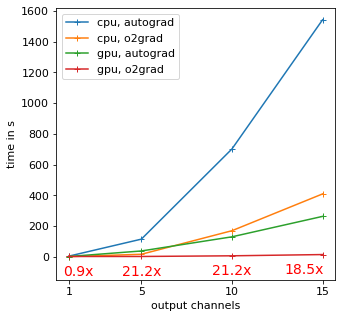

In [260]:
x = -50
data = df_out_channels
plotfig(data, 'out_channels', 'time', xlabel='output channels', ylabel='time in s', 
        annot=True,
        annot_offset=[(0.5,x), (0,x), (0,x), (-1,x)],
        va='top',
        c='r',
        ylim=dict(bottom=-150),
        savefig='conv1d_out_time')

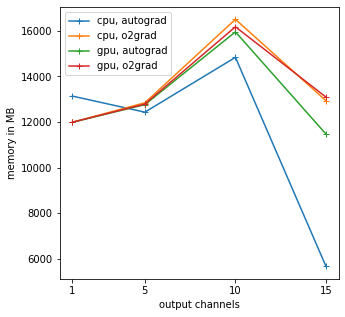

In [30]:
data = df_out_channels
plotfig(data, 'out_channels', 'mem', xlabel='output channels', ylabel='memory in MB', savefig='conv1d_out_mem')

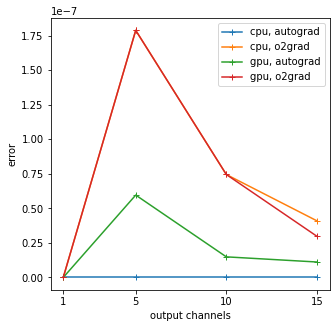

In [31]:
data = df_out_channels
plotfig(data, 'out_channels', 'err', xlabel='output channels', ylabel='error', savefig='conv1d_out_err')